In [1]:
import pickle
import os

## filename handle

file_name = "example/sample_file.pdf"
file_name_seperated = os.path.splitext(os.path.basename(file_name))[0]
### result table summary cache handle
context_result_file_path = f"pkl/{file_name_seperated}_context.pkl"
langchain_result_file_path = f"pkl/{file_name_seperated}_langchain_summary_results.pkl"
dspy_result_file_path = f"pkl/{file_name_seperated}_dspy_summary_results.pkl"

In [ ]:
# Summarize한 context 가져오기
with open(context_result_file_path, 'rb') as f:
    full_context = pickle.load(f)

# Langchain 결과 불러오기
with open(langchain_result_file_path, 'rb') as f:
    langchain_results = pickle.load(f)

# DSPy 결과 불러오기
with open(dspy_result_file_path, 'rb') as f:
    dspy_results = pickle.load(f)


print("Full context related:", full_context)
print("Langchain Results:", langchain_results)
print("DSPy Results:", dspy_results)

In [12]:
from rouge_score import rouge_scorer

def evaluate_summary(original, summary):
    # ROUGE
    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    rouge_scores = scorer.score(original, summary)

    return {
        "ROUGE-1": rouge_scores['rouge1'].fmeasure,
        "ROUGE-2": rouge_scores['rouge2'].fmeasure,
        "ROUGE-L": rouge_scores['rougeL'].fmeasure,
    }

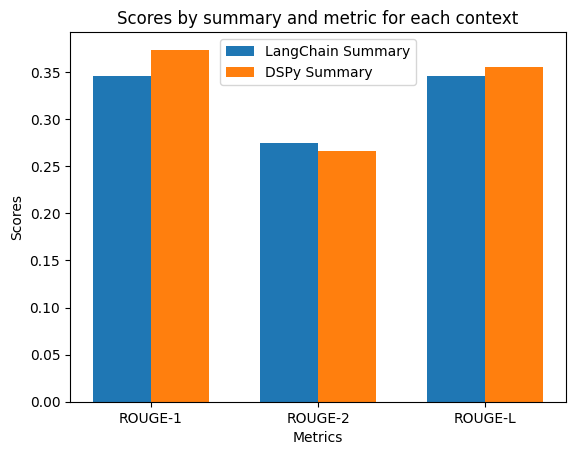

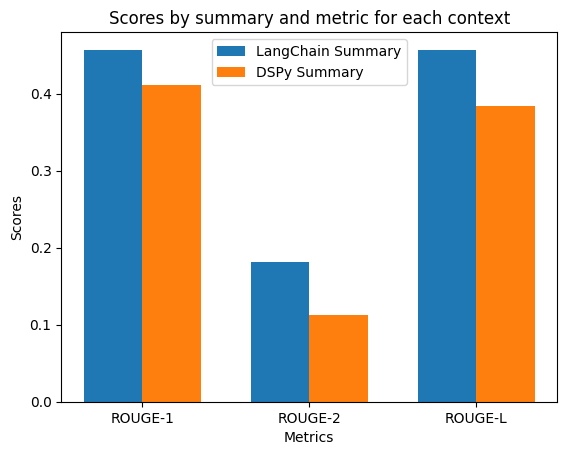

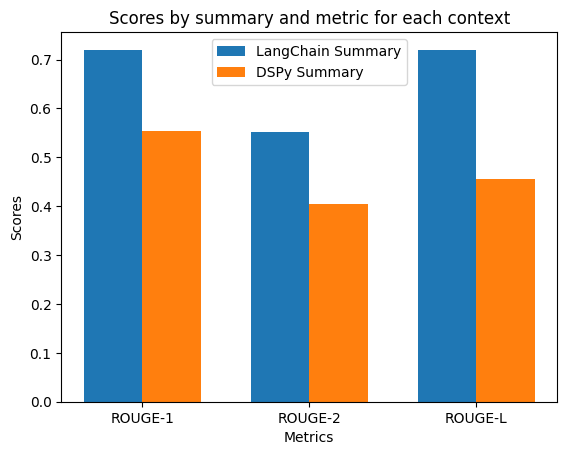

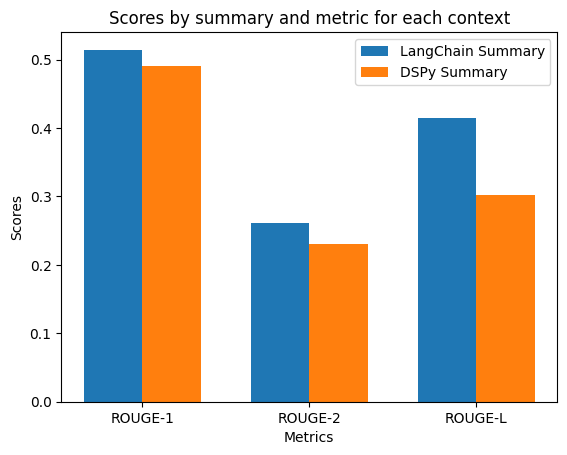

Context 1 - Overall Score for LangChain Summary: 0.3190
Context 1 - Overall Score for DSPy Summary: 0.3286
Better Summary for Context 1: DSPy Summary
Context 2 - Overall Score for LangChain Summary: 0.3617
Context 2 - Overall Score for DSPy Summary: 0.2994
Better Summary for Context 2: LangChain Summary
Context 3 - Overall Score for LangChain Summary: 0.6570
Context 3 - Overall Score for DSPy Summary: 0.4666
Better Summary for Context 3: LangChain Summary
Context 4 - Overall Score for LangChain Summary: 0.3925
Context 4 - Overall Score for DSPy Summary: 0.3377
Better Summary for Context 4: LangChain Summary


In [16]:
import matplotlib.pyplot as plt

overall_scores = []
weights = {'ROUGE-1': 0.33, 'ROUGE-2': 0.33, 'ROUGE-L': 0.33}

for doc, langchain, dspy in zip(full_context, langchain_results, dspy_results):
    results_langchain = evaluate_summary(doc, langchain)
    results_dspy = evaluate_summary(doc, dspy)

    # 가중치를 적용한 종합 점수 계산
    score_langchain = sum(results_langchain[key] * weights[key] for key in results_langchain)
    score_dspy = sum(results_dspy[key] * weights[key] for key in results_dspy)

    overall_scores.append((score_langchain, score_dspy))

    metrics = results_langchain.keys()
    scores_langchain = [results_langchain[m] for m in metrics]
    scores_dspy = [results_dspy[m] for m in metrics]

    fig, ax = plt.subplots()
    index = range(len(metrics))
    bar_width = 0.35

    rects1 = ax.bar(index, scores_langchain, bar_width, label='LangChain Summary')
    rects2 = ax.bar([p + bar_width for p in index], scores_dspy, bar_width, label='DSPy Summary')

    ax.set_xlabel('Metrics')
    ax.set_ylabel('Scores')
    ax.set_title('Scores by summary and metric for each context')
    ax.set_xticks([p + bar_width / 2 for p in index])
    ax.set_xticklabels(metrics)
    ax.legend()

    plt.show()


for idx, (score_langchain, score_dspy) in enumerate(overall_scores, start=1):
    print(f"Context {idx} - Overall Score for LangChain Summary: {score_langchain:.4f}")
    print(f"Context {idx} - Overall Score for DSPy Summary: {score_dspy:.4f}")
    print(f"Better Summary for Context {idx}: {'LangChain Summary' if score_langchain > score_dspy else 'DSPy Summary'}")


In [ ]:
## 여기에 dspy metric 이용해서 llm 평가 Agent 넣고 비교하면 될 듯.